<a href="https://colab.research.google.com/github/bswaika/kaggle_hm_recommender_competition/blob/master/kaggle_hm_eda.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# EDA
---
### [H&M Personalized Fashion - Kaggle](https://www.kaggle.com/competitions/h-and-m-personalized-fashion-recommendations)


## Module and data import



**Upload kaggle API key to download data from kaggle**

In [ ]:
from google.colab import files
kaggle_file = files.upload()

In [ ]:
!rm -rf ./sample_data && mkdir -p ~/.kaggle && cp ./kaggle.json ~/.kaggle/kaggle.json && rm ./kaggle.json && chmod 600 ~/.kaggle/kaggle.json

In [ ]:
!ls -ah ~ && ls -ah .

In [ ]:
!kaggle competitions download -c h-and-m-personalized-fashion-recommendations

---
**Unzip the downloaded archive** 

In [ ]:
!zip -d h-and-m-personalized-fashion-recommendations.zip images/*/*.jpg && unzip h-and-m-personalized-fashion-recommendations.zip && rm h-and-m-personalized-fashion-recommendations.zip

---
**Module Import**

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt

---
**Data Import**

In [2]:
file_paths = {
    'images': './images',
    'articles': './articles.csv',
    'customers': './customers.csv',
    'train': './transactions_train.csv',
} 

In [3]:
articles = pd.read_csv(file_paths['articles'], on_bad_lines='skip')
customers = pd.read_csv(file_paths['customers'], on_bad_lines='skip')
train = pd.read_csv(file_paths['train'], on_bad_lines='skip')


---
## Articles Data

**Attributes**

In [4]:
articles.dtypes

article_id                       int64
product_code                     int64
prod_name                       object
product_type_no                  int64
product_type_name               object
product_group_name              object
graphical_appearance_no          int64
graphical_appearance_name       object
colour_group_code                int64
colour_group_name               object
perceived_colour_value_id        int64
perceived_colour_value_name     object
perceived_colour_master_id       int64
perceived_colour_master_name    object
department_no                    int64
department_name                 object
index_code                      object
index_name                      object
index_group_no                   int64
index_group_name                object
section_no                       int64
section_name                    object
garment_group_no                 int64
garment_group_name              object
detail_desc                     object
dtype: object

**Data view**

In [5]:
articles.head()

,article_id,product_code,prod_name,product_type_no,product_type_name,product_group_name,graphical_appearance_no,graphical_appearance_name,colour_group_code,colour_group_name,...,department_name,index_code,index_name,index_group_no,index_group_name,section_no,section_name,garment_group_no,garment_group_name,detail_desc
0,108775015,108775,Strap top,253,Vest top,Garment Upper body,1010016,Solid,9,Black,...,Jersey Basic,A,Ladieswear,1,Ladieswear,16,Womens Everyday Basics,1002,Jersey Basic,Jersey top with narrow shoulder straps.
1,108775044,108775,Strap top,253,Vest top,Garment Upper body,1010016,Solid,10,White,...,Jersey Basic,A,Ladieswear,1,Ladieswear,16,Womens Everyday Basics,1002,Jersey Basic,Jersey top with narrow shoulder straps.
2,108775051,108775,Strap top (1),253,Vest top,Garment Upper body,1010017,Stripe,11,Off White,...,Jersey Basic,A,Ladieswear,1,Ladieswear,16,Womens Everyday Basics,1002,Jersey Basic,Jersey top with narrow shoulder straps.
3,110065001,110065,OP T-shirt (Idro),306,Bra,Underwear,1010016,Solid,9,Black,...,Clean Lingerie,B,Lingeries/Tights,1,Ladieswear,61,Womens Lingerie,1017,"Under-, Nightwear","Microfibre T-shirt bra with underwired, moulde..."
4,110065002,110065,OP T-shirt (Idro),306,Bra,Underwear,1010016,Solid,10,White,...,Clean Lingerie,B,Lingeries/Tights,1,Ladieswear,61,Womens Lingerie,1017,"Under-, Nightwear","Microfibre T-shirt bra with underwired, moulde..."


**Catgories of Products, Visualizations, and Useful Abstractions**

In [6]:
articles['prod_name'].unique().shape, articles['product_type_name'].unique().shape, articles['product_group_name'].unique().shape

((45875,), (131,), (19,))

In [7]:
pd.options.display.max_rows = None
articles.groupby(['product_group_name', 'product_type_name']).count()['article_id']

product_group_name     product_type_name       
Accessories            Accessories set                 7
                       Alice band                      6
                       Baby Bib                        3
                       Bag                          1280
                       Beanie                         56
                       Belt                          458
                       Bracelet                      180
                       Braces                          3
                       Bucket hat                      7
                       Cap                            13
                       Cap/peaked                    573
                       Dog Wear                       20
                       Earring                      1159
                       Earrings                       11
                       Eyeglasses                      2
                       Felt hat                       10
                       Giftbox          

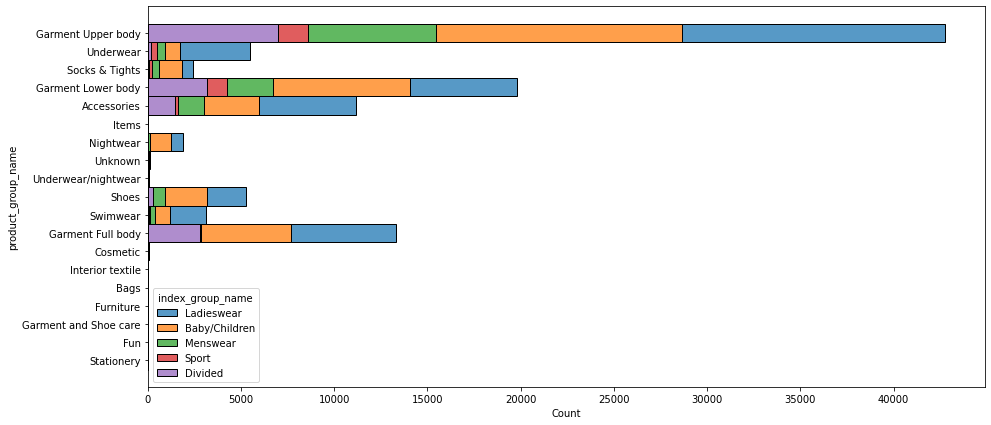

In [8]:
plt.subplots(figsize=(15, 7))
sns.histplot(data=articles, y='product_group_name', hue='index_group_name', multiple='stack')
plt.show()

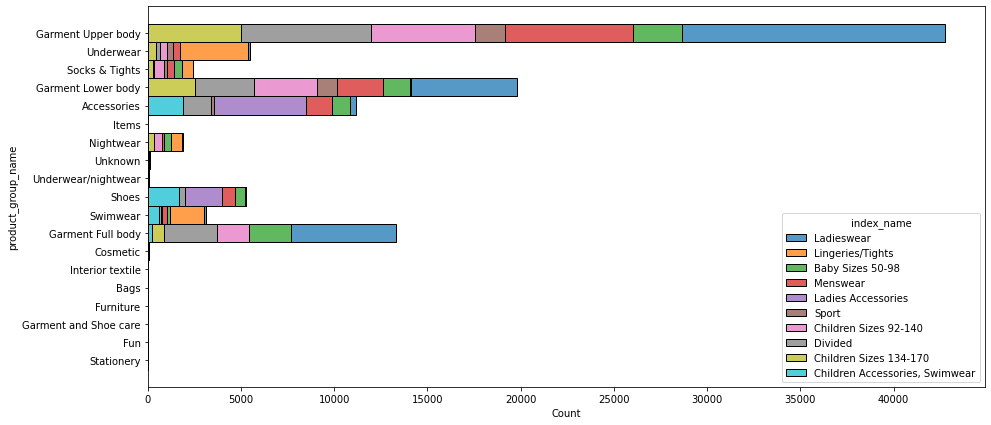

In [9]:
plt.subplots(figsize=(15, 7))
sns.histplot(data=articles, y='product_group_name', hue='index_name', multiple='stack')
plt.show()

In [10]:
unique_counts = ((col, articles[col].unique().shape[0]) for col in articles.columns if not 'no' in col and not 'id' in col and not 'code' in col)
for col, count in unique_counts:
  print(col, ':', count)

prod_name : 45875
product_type_name : 131
product_group_name : 19
graphical_appearance_name : 30
colour_group_name : 50
perceived_colour_value_name : 8
perceived_colour_master_name : 20
department_name : 250
index_name : 10
index_group_name : 5
section_name : 56
garment_group_name : 21
detail_desc : 43405


In [11]:
articles.groupby(['index_group_name', 'index_name']).count()['article_id']

index_group_name  index_name                    
Baby/Children     Baby Sizes 50-98                   8875
                  Children Accessories, Swimwear     4615
                  Children Sizes 134-170             9214
                  Children Sizes 92-140             12007
Divided           Divided                           15149
Ladieswear        Ladies Accessories                 6961
                  Ladieswear                        26001
                  Lingeries/Tights                   6775
Menswear          Menswear                          12553
Sport             Sport                              3392
Name: article_id, dtype: int64

In [12]:
pd.options.display.max_rows = None
articles.groupby(['colour_group_name', 'perceived_colour_master_name']).count()['article_id']

colour_group_name  perceived_colour_master_name
Beige              Beige                            1874
                   Grey                                7
                   Mole                              831
Black              Black                           22331
                   Green                              52
                   Grey                              220
                   Unknown                            67
Blue               Blue                             3273
                   Lilac Purple                       15
                   Turquoise                          20
Bronze/Copper      Metal                              94
Dark Beige         Beige                             732
                   Brown                             286
                   Khaki green                        20
                   Mole                               46
Dark Blue          Blue                            12008
                   Green                

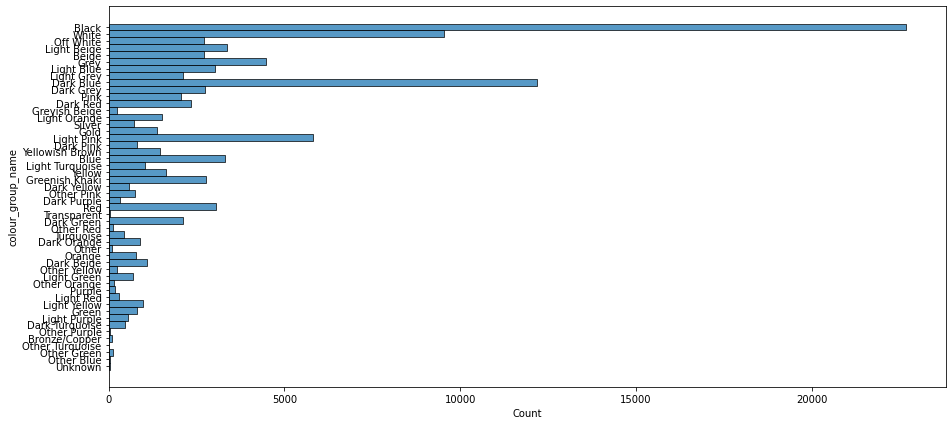

In [13]:
plt.subplots(figsize=(15, 7))
sns.histplot(data=articles, y='colour_group_name')
plt.show()

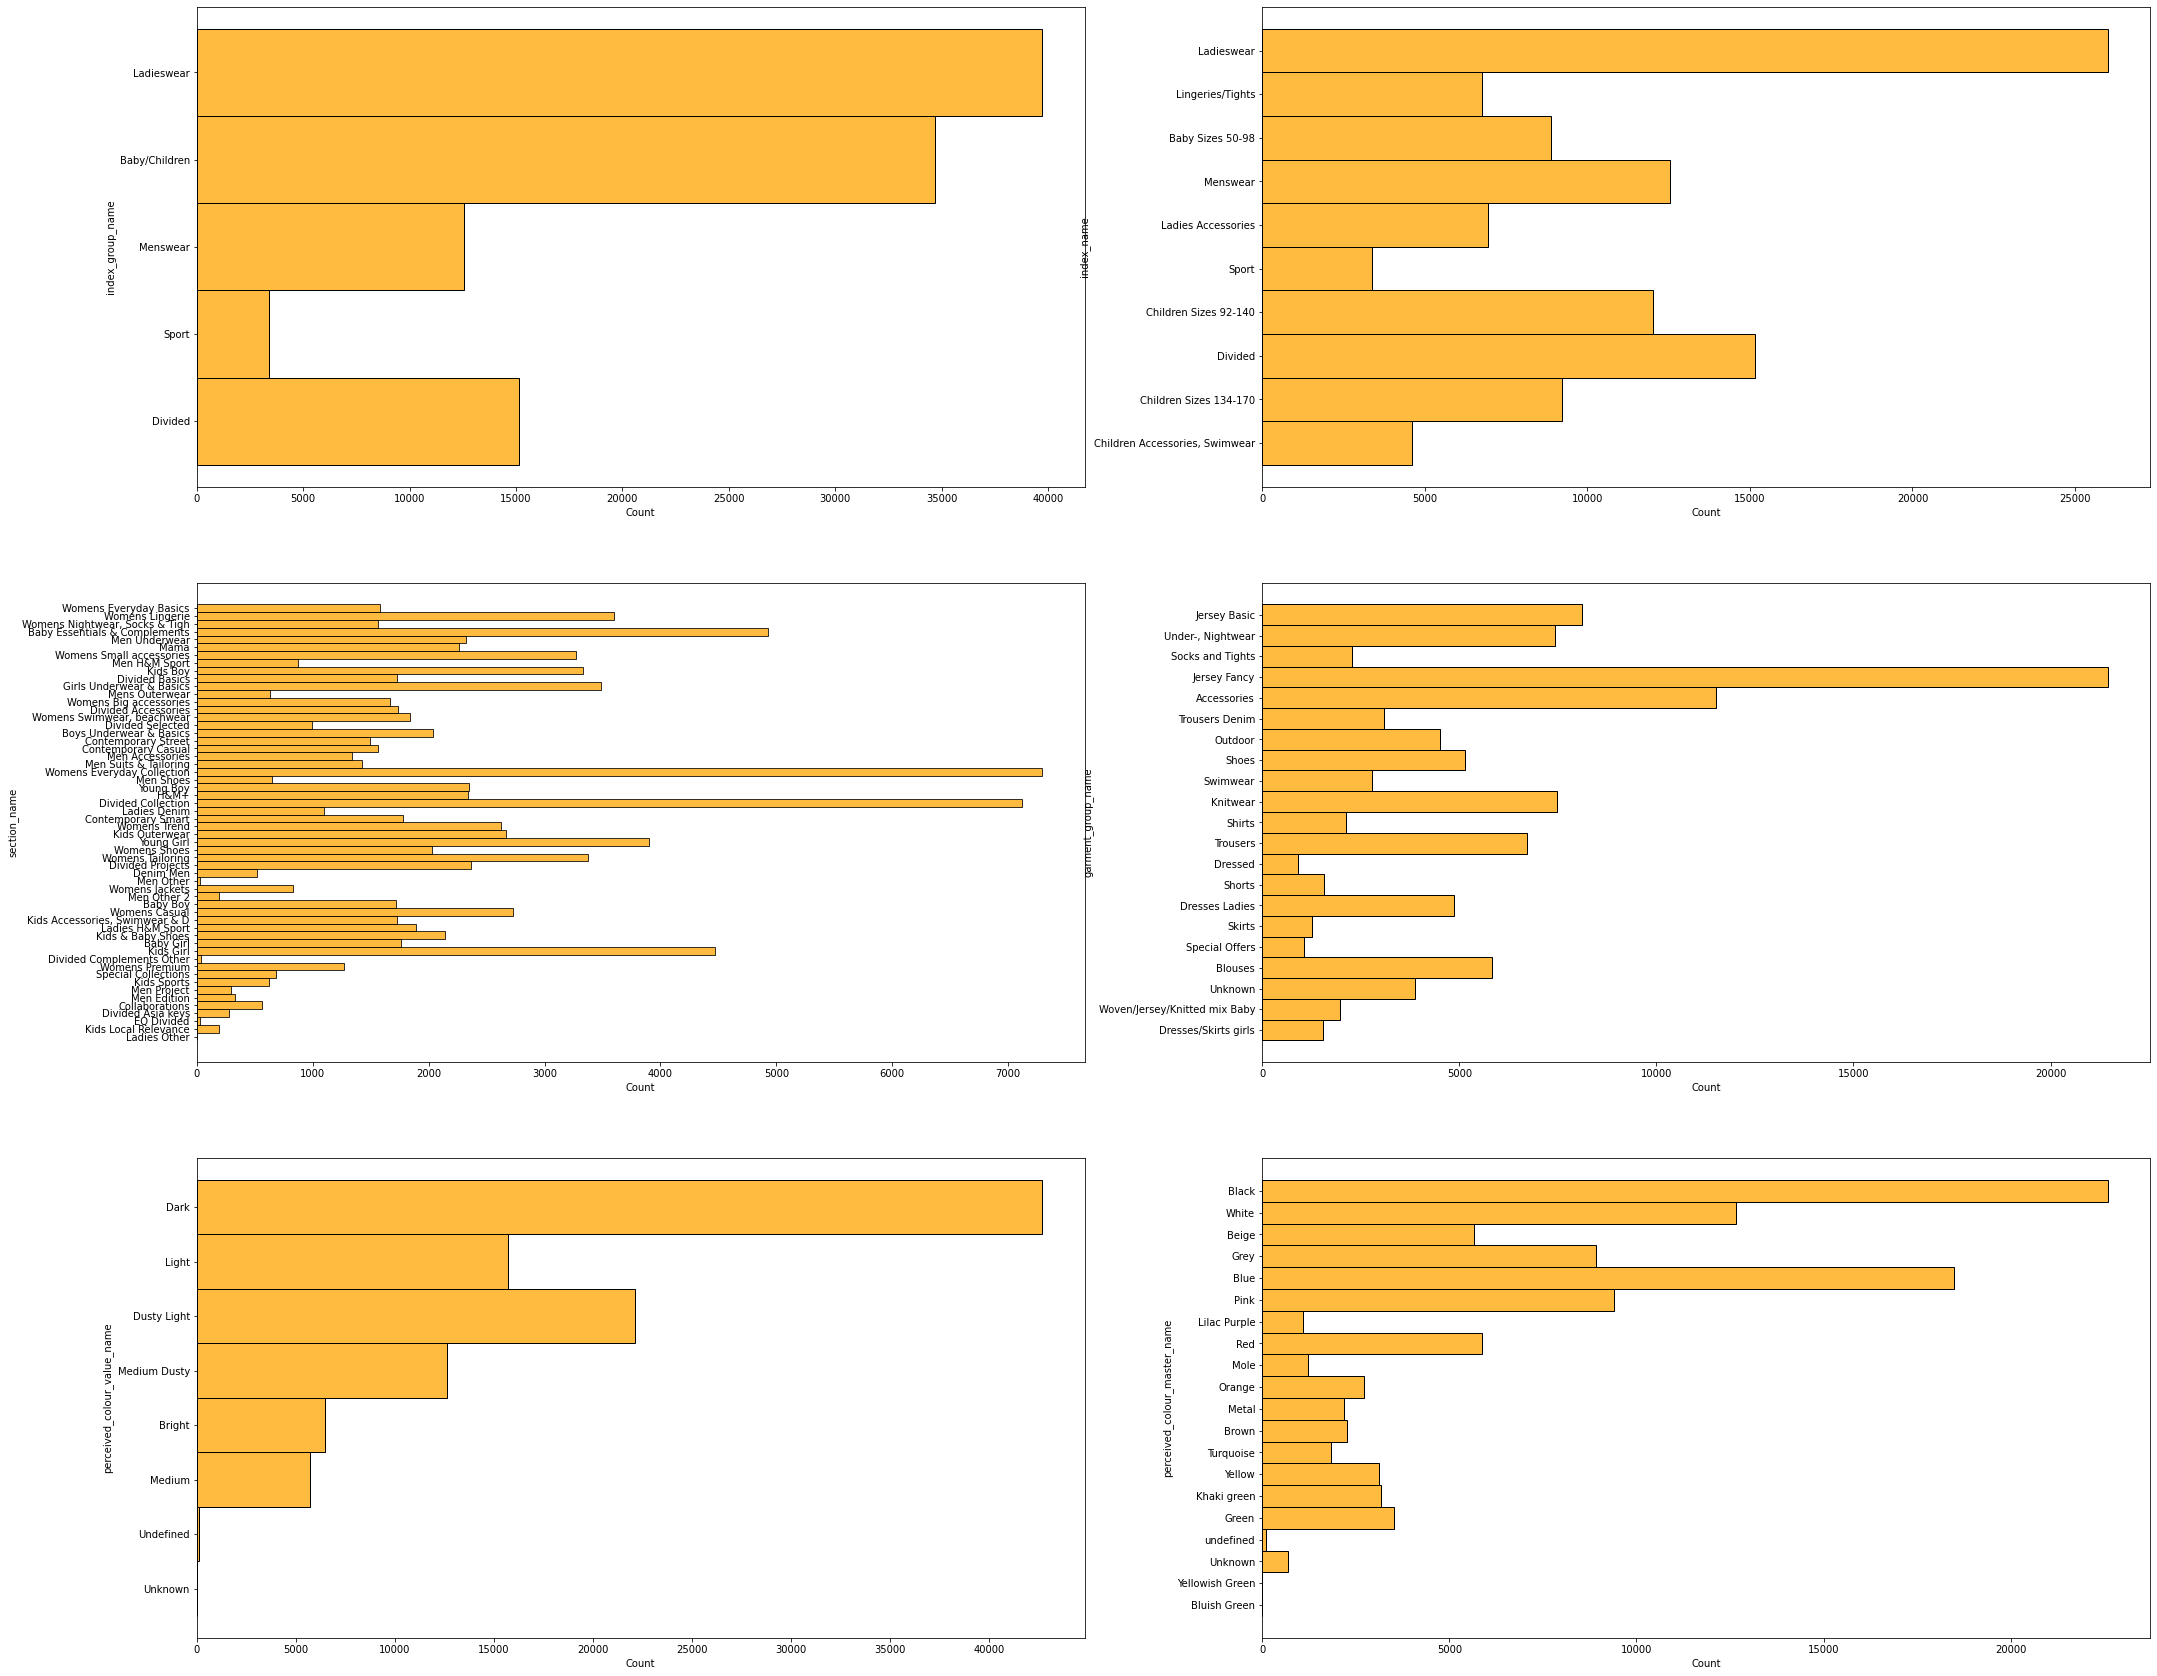

In [14]:
fig, ax = plt.subplots(3, 2, figsize=(35, 30))
sns.histplot(data=articles, y='index_group_name', color='orange', ax=ax[0][0])
sns.histplot(data=articles, y='index_name', color='orange', ax=ax[0][1])
sns.histplot(data=articles, y='section_name', color='orange', ax=ax[1][0])
sns.histplot(data=articles, y='garment_group_name', color='orange', ax=ax[1][1])
sns.histplot(data=articles, y='perceived_colour_value_name', color='orange', ax=ax[2][0])
sns.histplot(data=articles, y='perceived_colour_master_name', color='orange', ax=ax[2][1])
plt.show()

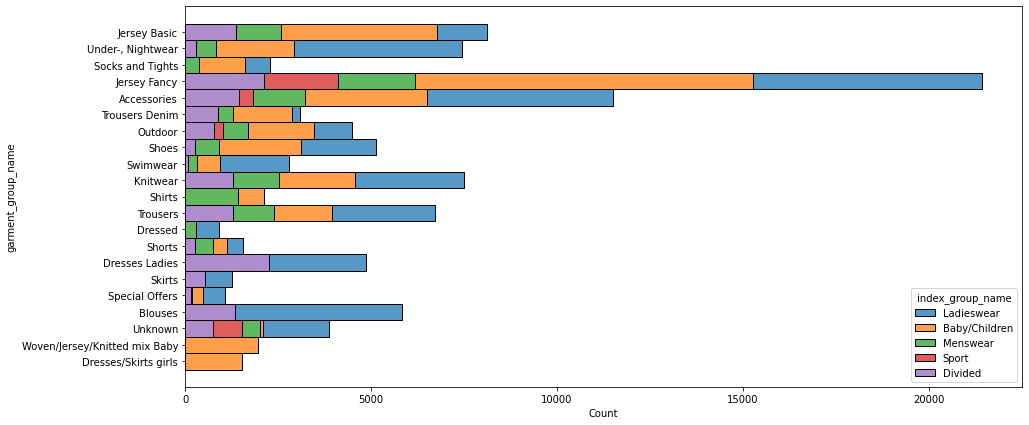

In [15]:
plt.subplots(figsize=(15, 7))
sns.histplot(data=articles, y='garment_group_name', hue='index_group_name', multiple='stack')
plt.show()

**Encoded Article DataFrame**

Getting rid of the columns that have the descriptions for categories and colours, and just keeping the encoded columns in the dataframe. Furthermore, making dictionaries to store (code, name) associations.

In [16]:
articles.dtypes

article_id                       int64
product_code                     int64
prod_name                       object
product_type_no                  int64
product_type_name               object
product_group_name              object
graphical_appearance_no          int64
graphical_appearance_name       object
colour_group_code                int64
colour_group_name               object
perceived_colour_value_id        int64
perceived_colour_value_name     object
perceived_colour_master_id       int64
perceived_colour_master_name    object
department_no                    int64
department_name                 object
index_code                      object
index_name                      object
index_group_no                   int64
index_group_name                object
section_no                       int64
section_name                    object
garment_group_no                 int64
garment_group_name              object
detail_desc                     object
dtype: object

In [17]:
selectors = [col for col in articles.columns if any(['id' in col, 'code' in col, 'no' in col])]
articles_encoded = articles.loc[:, selectors]
articles_encoded.head()

,article_id,product_code,product_type_no,graphical_appearance_no,colour_group_code,perceived_colour_value_id,perceived_colour_master_id,department_no,index_code,index_group_no,section_no,garment_group_no
0,108775015,108775,253,1010016,9,4,5,1676,A,1,16,1002
1,108775044,108775,253,1010016,10,3,9,1676,A,1,16,1002
2,108775051,108775,253,1010017,11,1,9,1676,A,1,16,1002
3,110065001,110065,306,1010016,9,4,5,1339,B,1,61,1017
4,110065002,110065,306,1010016,10,3,9,1339,B,1,61,1017


In [18]:
def create_association(id, name):  
  association_dict = articles[[id, name]]
  association_dict = association_dict.set_index([id]).to_dict()[name]
  return pd.DataFrame.from_dict(association_dict, orient='index', columns=['name'])

In [19]:
product_types = create_association('product_type_no', 'product_type_name')
departments = create_association('department_no', 'department_name')
index_groups = create_association('index_group_no', 'index_group_name')
sections = create_association('section_no', 'section_name')
garment_groups = create_association('garment_group_no', 'garment_group_name')
graphical_appearances = create_association('graphical_appearance_no', 'graphical_appearance_name')
colour_groups = create_association('colour_group_code', 'colour_group_name')
indexes = create_association('index_code', 'index_name')
perceived_colour_values = create_association('perceived_colour_value_id', 'perceived_colour_value_name')
perceived_colour_masters = create_association('perceived_colour_master_id', 'perceived_colour_master_name')

In [ ]:
articles_encoded['index_code'] = articles_encoded['index_code'].astype('category')
index_codes = articles_encoded['index_code'].cat.categories
articles_encoded['index_code'] = articles_encoded['index_code'].cat.codes

---
## Customers Data

**Attributes**

In [20]:
customers.dtypes

customer_id                object
FN                        float64
Active                    float64
club_member_status         object
fashion_news_frequency     object
age                       float64
postal_code                object
dtype: object

**Data View**

In [21]:
customers.head()

,customer_id,FN,Active,club_member_status,fashion_news_frequency,age,postal_code
0,00000dbacae5abe5e23885899a1fa44253a17956c6d1c3...,NaN,NaN,ACTIVE,NONE,49.0,52043ee2162cf5aa7ee79974281641c6f11a68d276429a...
1,0000423b00ade91418cceaf3b26c6af3dd342b51fd051e...,NaN,NaN,ACTIVE,NONE,25.0,2973abc54daa8a5f8ccfe9362140c63247c5eee03f1d93...
2,000058a12d5b43e67d225668fa1f8d618c13dc232df0ca...,NaN,NaN,ACTIVE,NONE,24.0,64f17e6a330a85798e4998f62d0930d14db8db1c054af6...
3,00005ca1c9ed5f5146b52ac8639a40ca9d57aeff4d1bd2...,NaN,NaN,ACTIVE,NONE,54.0,5d36574f52495e81f019b680c843c443bd343d5ca5b1c2...
4,00006413d8573cd20ed7128e53b7b13819fe5cfc2d801f...,1.0,1.0,ACTIVE,Regularly,52.0,25fa5ddee9aac01b35208d01736e57942317d756b32ddd...


**Age Demographics**

In [22]:
customers['age'].fillna(0.0, inplace=True)

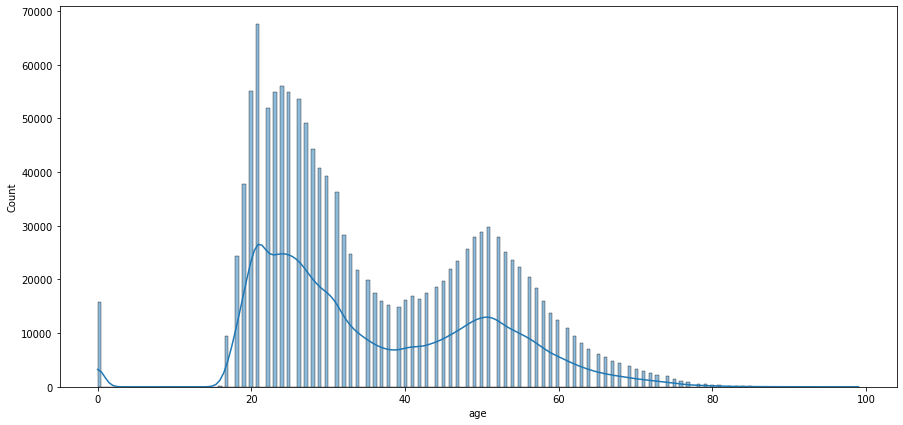

In [23]:
plt.subplots(figsize=(15, 7))
sns.histplot(data=customers, x='age', kde=True)
plt.show()

**Membership Status**

In [24]:
customers['club_member_status'].fillna('NONE', inplace=True)

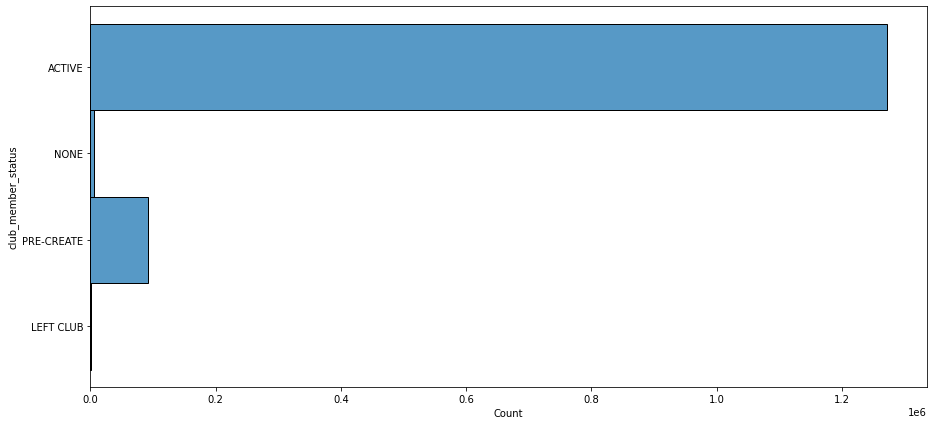

In [25]:
plt.subplots(figsize=(15, 7))
sns.histplot(data=customers, y='club_member_status')
plt.show()

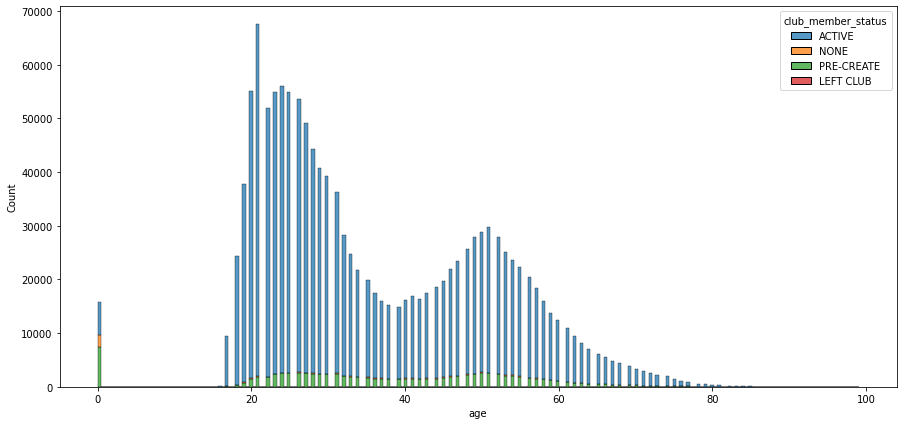

In [26]:
plt.subplots(figsize=(15, 7))
sns.histplot(data=customers, x='age', hue='club_member_status', multiple='stack')
plt.show()

**Clean Up Active and FN Column**

Fill 0.0 for NA

In [27]:
customers['Active'].fillna(0.0, inplace=True)
customers['FN'].fillna(0.0, inplace=True)

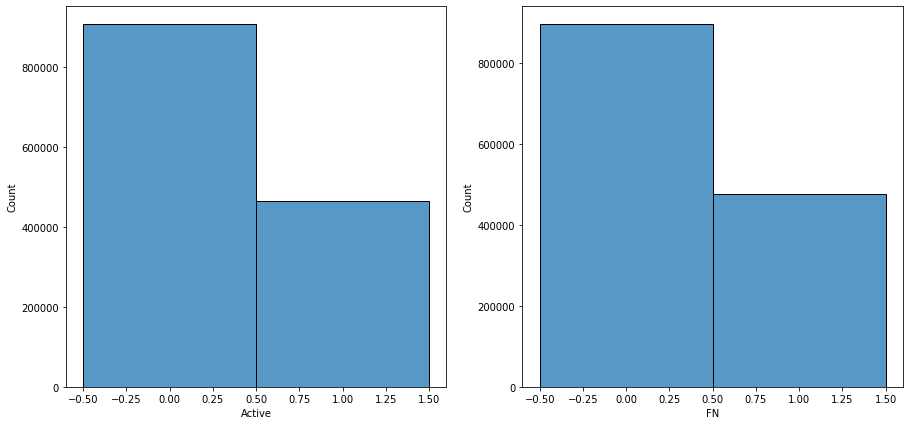

In [28]:
fig, ax = plt.subplots(1, 2, figsize=(15, 7))
sns.histplot(data=customers, x='Active', discrete=True, ax=ax[0])
sns.histplot(data=customers, x='FN', discrete=True, ax=ax[1])
plt.show()

**Fashion News Frequency**

In [29]:
customers['fashion_news_frequency'].fillna('NONE', inplace=True)

In [30]:
customers['fashion_news_frequency'] = customers['fashion_news_frequency'].str.replace('NONE', 'None')

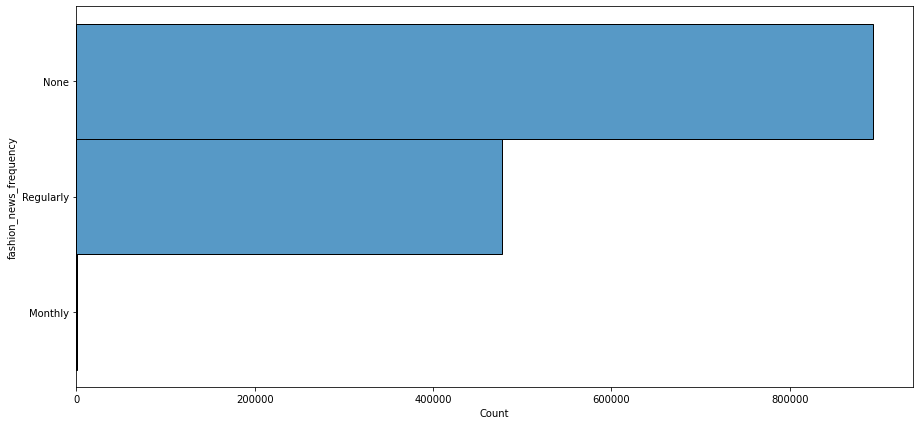

In [31]:
plt.subplots(figsize=(15, 7))
sns.histplot(data=customers, y='fashion_news_frequency')
plt.show()

**Other Visualisations**

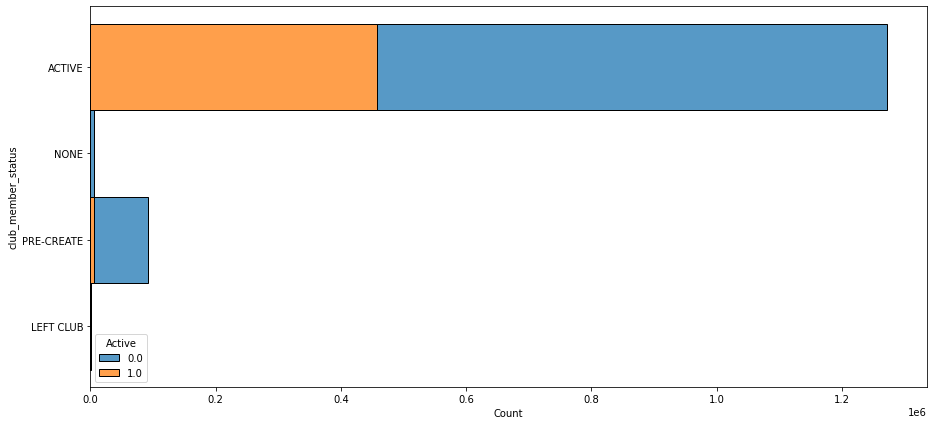

In [32]:
plt.subplots(figsize=(15, 7))
sns.histplot(data=customers, y='club_member_status', hue='Active', multiple='stack')
plt.show()

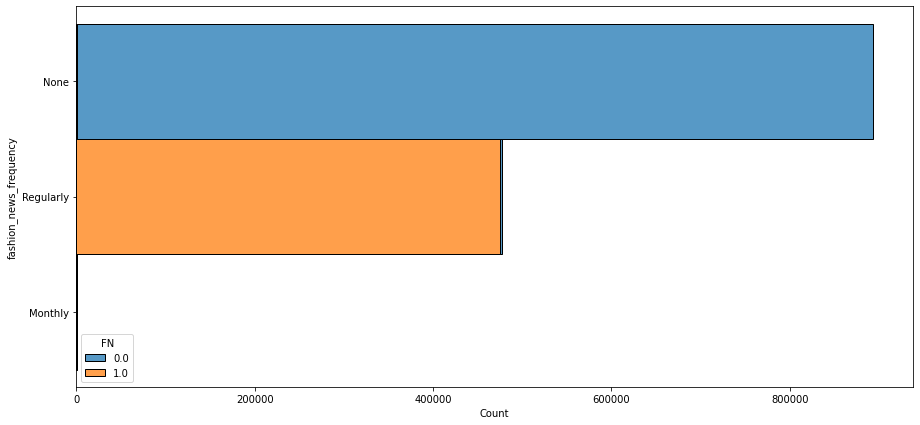

In [33]:
plt.subplots(figsize=(15, 7))
sns.histplot(data=customers, y='fashion_news_frequency', hue='FN', multiple='stack')
plt.show()

**Encoded Customer Data**

In [41]:
customers['fashion_news_frequency'] = customers['fashion_news_frequency'].astype('category')
customers['club_member_status'] = customers['club_member_status'].astype('category')
customers['Active'] = customers['Active'].astype('category')
customers['FN'] = customers['FN'].astype('category')

In [47]:
member_statuses = customers['club_member_status'].cat.categories
customers['club_member_status'] = customers['club_member_status'].cat.codes

In [50]:
news_freqs = customers['fashion_news_frequency'].cat.categories
customers['fashion_news_frequency'] = customers['fashion_news_frequency'].cat.codes

**Area Grouping**

In [59]:
customers.groupby('postal_code').count()['customer_id'].sort_values(ascending=False).head()

postal_code
2c29ae653a9282cce4151bd87643c907644e09541abc28ae87dea0d1f6603b1c    120303
cc4ed85e30f4977dae47662ddc468cd2eec11472de6fac5ec985080fd92243c8       261
714976379549eb90aae4a71bca6c7402cc646ae7c40f6c1cb91d4b5a18623fc1       159
7c1fa3b0ec1d37ce2c3f34f63bd792f3b4494f324b6be5d1e4ba6a75456b96a7       157
5b7eb31eabebd3277de632b82267286d847fd5d44287ee150bb4206b48439145       156
Name: customer_id, dtype: int64

---
## Transactions Data

**Attributes**

In [62]:
train.dtypes

t_dat                object
customer_id          object
article_id            int64
price               float64
sales_channel_id      int64
dtype: object